Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)
Shape of A2 in predict(): (1, 3)
Shape of predictions: (1, 3)
predictions mean = 0.6666666666666666
Cost after iteration 0: 0.6943375521462316
Cost after iteration 1000: 0.2813378252297155
Cost after iteration 2000: 0.2690975387872664
Cost after iteration 3000: 0.26177805483613303
Cost after iteration 4000: 0.2364444671172997
Cost after iteration 5000: 0.22541249819616638
Cost after iteration 6000: 0.22131231324125608
Cost after iteration 7000: 0.21868758889080958
Cost after iteration 8000: 0.2167082614274134
Cost after iteration 9000: 0.21511369833759317
Shape of input X to predict(): (2, 1038240)
Shape of A2 in predict(): (1, 1038240)
Shape of predictions: (1, 1038240)
Shape of predictions from debug_predict: (1, 1038240)


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

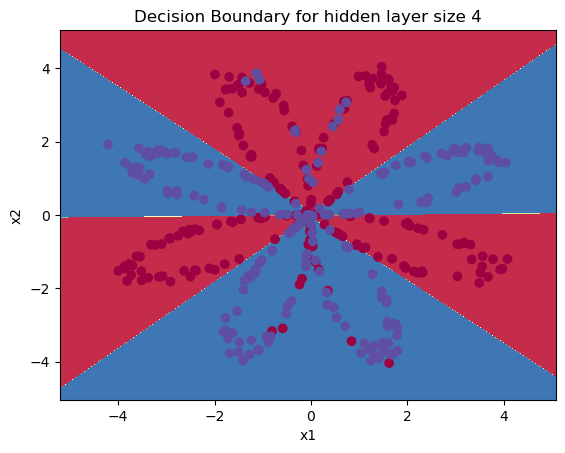

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from testcases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(1)

import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

# Load dataset
X, Y = load_planar_dataset()

# Plot dataset
plt.scatter(X[0, :], X[1, :], c=Y, s=35, cmap=plt.cm.Spectral)

# Logistic Regression model
regclf = sklearn.linear_model.LogisticRegressionCV()
regclf.fit(X.T, Y.T)

plot_decision_boundary(lambda j: regclf.predict(j), X, Y)
plt.title("Logistic Regression")

LR_predictions = regclf.predict(X.T)
print('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) 
                                                       + np.dot(1-Y, 1-LR_predictions)) / float(Y.size) * 100) +
      '% ' + "(percentage of correctly labelled datapoints)")

# Fixing layer_sizes function
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]  # ✅ Fixed reference to Y instead of y
    return n_x, n_h, n_y

# Initialize parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.rand(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.rand(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# Forward propagation
def forwardProp(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

# Compute cost
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = -np.sum(logprobs) / m
    return np.squeeze(cost)

# Backward propagation
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1, W2 = parameters["W1"], parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

# Update parameters
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"] - learning_rate * grads["dW1"]
    b1 = parameters["b1"] - learning_rate * grads["db1"]
    W2 = parameters["W2"] - learning_rate * grads["dW2"]
    b2 = parameters["b2"] - learning_rate * grads["db2"]
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# Neural network model
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x, _, n_y = layer_sizes(X, Y)

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(num_iterations):
        A2, cache = forwardProp(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters

# Predict function with debugging
def predict(parameters, X):
    A2, cache = forwardProp(X, parameters)
    print("Shape of A2 in predict():", A2.shape)  # Debugging
    predictions = (A2 > 0.5).astype(int)
    print("Shape of predictions:", predictions.shape)  # Debugging
    return predictions

# Debugging function for plot_decision_boundary
def debug_predict(parameters, X):
    print("Shape of input X to predict():", X.shape)  # Debugging
    predictions = predict(parameters, X)
    print("Shape of predictions from debug_predict:", predictions.shape)  # Debugging
    return predictions

# Test predict function
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean =", np.mean(predictions))

# Train the model
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)

# Plot decision boundary with debugging
plot_decision_boundary(lambda x: debug_predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size 4")
